# **Tugas 1**: Observasi berbagai arsitektur CNN dalam klasifikasi objek

Eksplorasi dan observasi pengaruh arsitektur Convolutional Neural Network (CNN) dalam task klasifikasi objek.

---

## Dependencies

In [1]:
import zipfile, os, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2
from tensorflow.keras import layers, models

## Dataset
Dataset yang digunakan merupakan bagian dari dataset Food101 (https://www.kaggle.com/datasets/dansbecker/food-101). Pada penelitian ini, diambil 10 kelas makanan dari keseluruhan kelas pada dataset Food101. Untuk menyederhanakan penelitian, digunakan 10% jumlah gambar dari 10 kelas yang tersedia.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

with zipfile.ZipFile("10_food_classes_10_percent.zip", "r") as zip_ref:
    zip_ref.extractall()

## Preparing and Preprocessing Data

In [ ]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

# Resize
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Normalisation and Augmented
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
print("Training Images:")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

print("Testing Images:")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

y_true = test_data.classes
target_names = list(test_data.class_indices.keys())

# Implementasi Arsitektur CNN
**VGG16**

VGG16 merupakan arsitektur CNN yang terdiri dari 16 layer dengan susunan konvolusi 3x3 yang berurutan. Arsitektur ini cukup dalam namun menggunakan banyak parameter, yang membuatnya cukup berat dan membutuhkan waktu pelatihan yang lebih lama. VGG16 dikenal memiliki performa yang solid meski kurang efisien dibanding arsitektur modern.

**ResNet50**

ResNet50 adalah varian dari Residual Network dengan 50 layer. Keunikan dari arsitektur ini adalah penggunaan residual block yang memungkinkan pelatihan jaringan yang lebih dalam tanpa mengalami degradasi performa. Namun, dari hasil eksperimen, performanya jauh di bawah ekspektasi, kemungkinan karena overfitting, underfitting, atau masalah preprocessing.

**MobileNetV2**

MobileNetV2 merupakan arsitektur ringan yang dirancang untuk efisiensi komputasi. Ia menggunakan depthwise separable convolutions dan inverted residuals. Meskipun lebih ringan, hasil eksperimen menunjukkan bahwa MobileNetV2 justru memberikan hasil paling optimal di antara ketiganya, baik dari segi akurasi maupun efisiensi.



# Pelatihan dan Evaluasi Model

In [ ]:
def build_model(base_model):
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

Training VGG16...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 137s 528ms/step - accuracy: 0.2233 - loss: 2.1609 - val_accuracy: 0.5344 - val_loss: 1.5394
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 114s 484ms/step - accuracy: 0.4301 - loss: 1.6746 - val_accuracy: 0.5740 - val_loss: 1.2989
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 123s 525ms/step - accuracy: 0.4858 - loss: 1.5124 - val_accuracy: 0.6132 - val_loss: 1.2112
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 489ms/step - accuracy: 0.5186 - loss: 1.4155 - val_accuracy: 0.6328 - val_loss: 1.1269
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 114s 485ms/step - accuracy: 0.5526 - loss: 1.3381 - val_accuracy: 0.6308 - val_loss: 1.0982
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 114s 486ms/step - accuracy: 0.5458 - loss: 1.3220 - val_accuracy: 0.6532 - val_loss: 1.0376
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 116s 495ms/step - accuracy: 0.5758 - loss: 1.2727 - val_accuracy: 0.6712 - val_loss: 0.9856
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 115s 487ms/step - accuracy: 0.5816 -

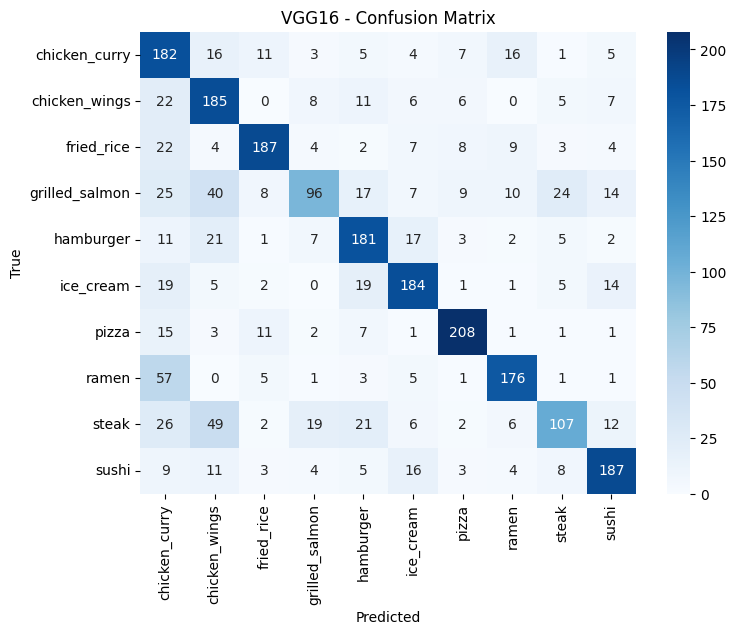

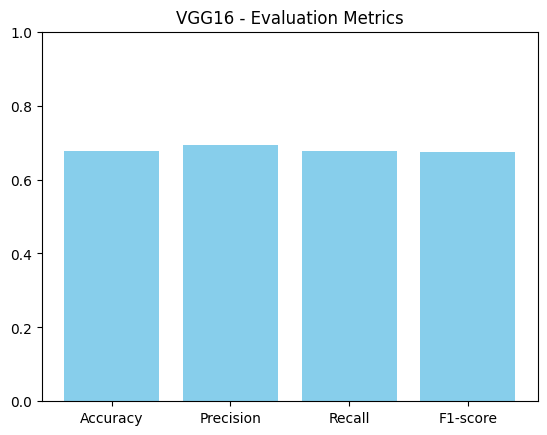


Training ResNet50...
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 135s 516ms/step - accuracy: 0.1073 - loss: 2.3826 - val_accuracy: 0.1296 - val_loss: 2.2968
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 104s 441ms/step - accuracy: 0.1122 - loss: 2.2990 - val_accuracy: 0.1244 - val_loss: 2.2846
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 105s 445ms/step - accuracy: 0.1183 - loss: 2.2913 - val_accuracy: 0.1480 - val_loss: 2.2733
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 103s 438ms/step - accuracy: 0.1200 - loss: 2.2846 - val_accuracy: 0.1468 - val_loss: 2.2656
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 105s 448ms/step - accuracy: 0.1238 - loss: 2.2832 - val_accuracy: 0.1580 - val_loss: 2.2600
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 103s 439ms/step - accuracy: 0.1168 - loss: 2.2835 - val_accuracy: 0.1424 - val_loss: 2.2641
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 104s 444ms/step - accuracy: 0.1273 - loss: 2.2816 - val_accuracy: 0.1536 - val_loss: 2.2589
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 104s 441ms/ste

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


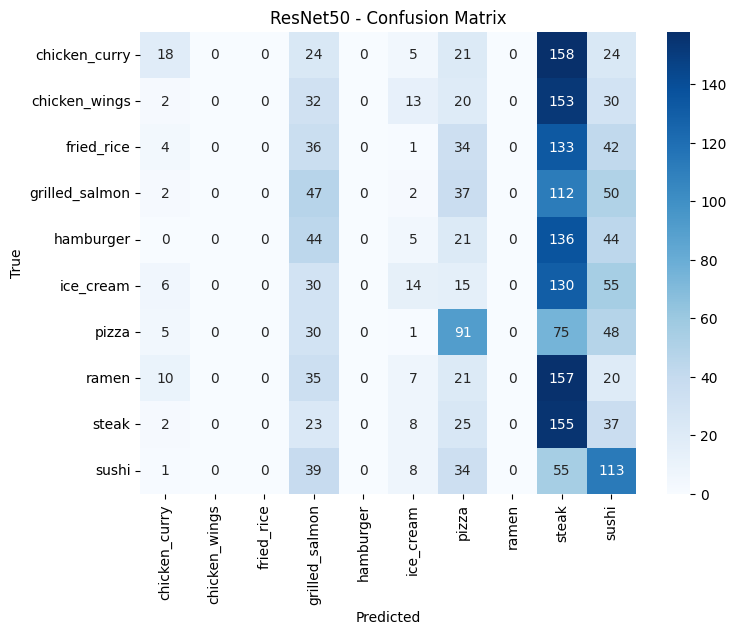

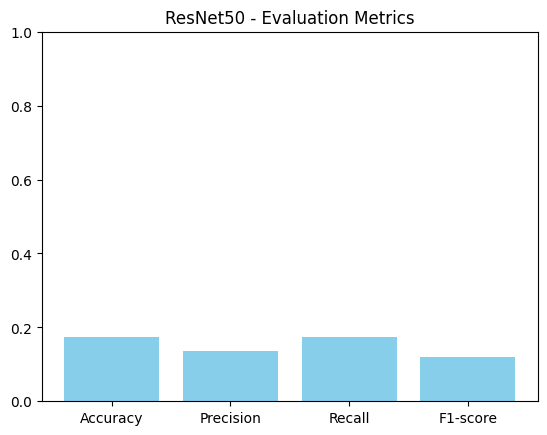


Training MobileNetV2...
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 115s 451ms/step - accuracy: 0.5314 - loss: 1.4315 - val_accuracy: 0.8072 - val_loss: 0.5704
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 96s 409ms/step - accuracy: 0.7380 - loss: 0.7818 - val_accuracy: 0.8232 - val_loss: 0.5116
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 97s 415ms/step - accuracy: 0.7665 - loss: 0.7110 - val_accuracy: 0.8308 - val_loss: 0.5015
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 420ms/step - accuracy: 0.7880 - loss: 0.6439 - val_accuracy: 0.8432 - val_loss: 0.4798
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 98s 418ms/step - accuracy: 0.7985 - loss: 0.6046 - val_accuracy: 0.8424 - val_loss: 0.4699
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 97s 413ms/step - accuracy: 0.8038 - loss: 0.5965 - val_accuracy: 0.8412 - val_loss: 0.4866
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 98s 415ms/step - accuracy: 0.8136 - loss: 0.5443 - val_accuracy: 0.8400 - val_loss: 0.4671
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 99s 421ms/step -

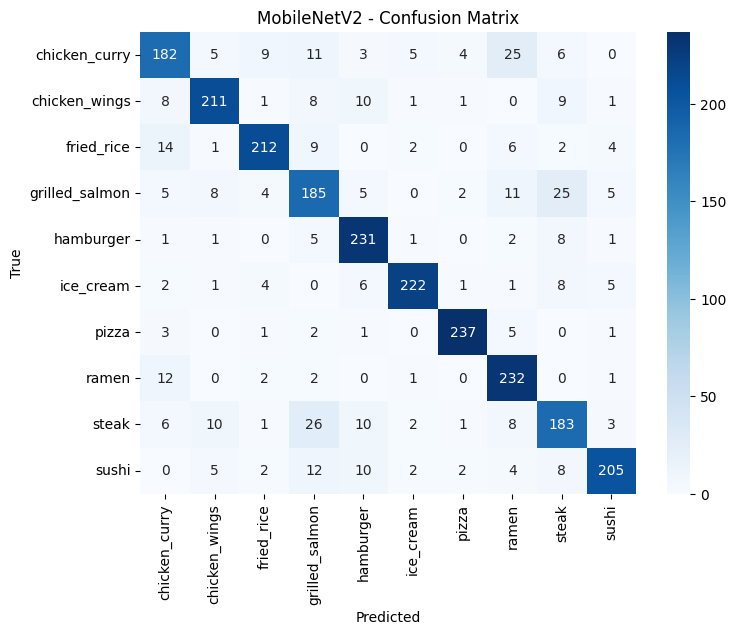

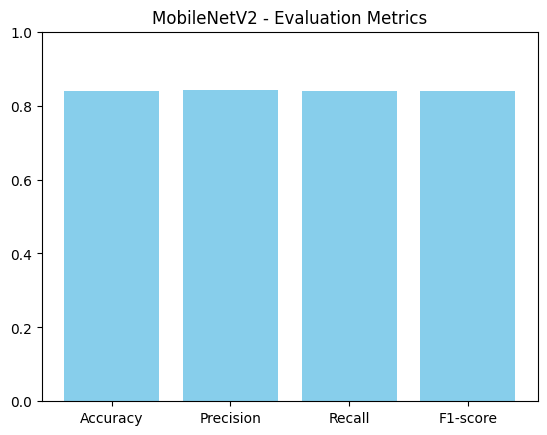

In [ ]:
results = {}

for name, base in zip(['VGG16', 'ResNet50', 'MobileNetV2'],
                      [VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3)),
                       ResNet50(weights="imagenet", include_top=False, input_shape=(224,224,3)),
                       MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))]):
    print(f"\nTraining {name}...")
    model = build_model(base)
    history = model.fit(train_data, epochs=10, validation_data=test_data)

    y_pred = model.predict(test_data)
    y_pred_classes = np.argmax(y_pred, axis=1)

    acc = accuracy_score(y_true, y_pred_classes)
    prec = precision_score(y_true, y_pred_classes, average='macro')
    rec = recall_score(y_true, y_pred_classes, average='macro')
    f1 = f1_score(y_true, y_pred_classes, average='macro')
    cm = confusion_matrix(y_true, y_pred_classes)

    results[name] = {
        'model': model,
        'history': history,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'confusion_matrix': cm
    }

    # Confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Evaluation metrics
    plt.bar(["Accuracy", "Precision", "Recall", "F1-score"], [acc, prec, rec, f1], color='skyblue')
    plt.title(f"{name} - Evaluation Metrics")
    plt.ylim(0, 1)
    plt.show()

# Analisis & Visualisasi Hasil

**Resnet50**

- ResNet memiliki lapisan residual yang dirancang untuk mencegah degradasi performa pada model yang sangat dalam. Namun, pada dataset kecil, lapisan ini dapat memperparah fluktuasi jika model tidak dilatih dengan konfigurasi yang tepat.

- Dataset kecil cenderung menghasilkan gradien yang tidak stabil, terutama jika data tidak terdistribusi dengan baik di setiap batch selama pelatihan.


**VGG16**

- VGG16 adalah model yang lebih sederhana dibandingkan ResNet, sehingga lebih cocok untuk dataset kecil dengan variasi yang terbatas:

- VGG16 memiliki arsitektur berlapis-lapis tanpa shortcut atau mekanisme kompleks lainnya, yang membuatnya lebih mudah untuk dilatih dan menghasilkan stabilitas yang lebih baik.

- Dibandingkan dengan ResNet , VGG16 memiliki jumlah parameter yang lebih sedikit, sehingga lebih cocok untuk dataset kecil.


**MobileNetV2**

- MobileNetV2 adalah model yang dirancang untuk efisiensi tinggi, sehingga sangat cocok untuk dataset kecil dengan kebutuhan komputasi yang terbatas



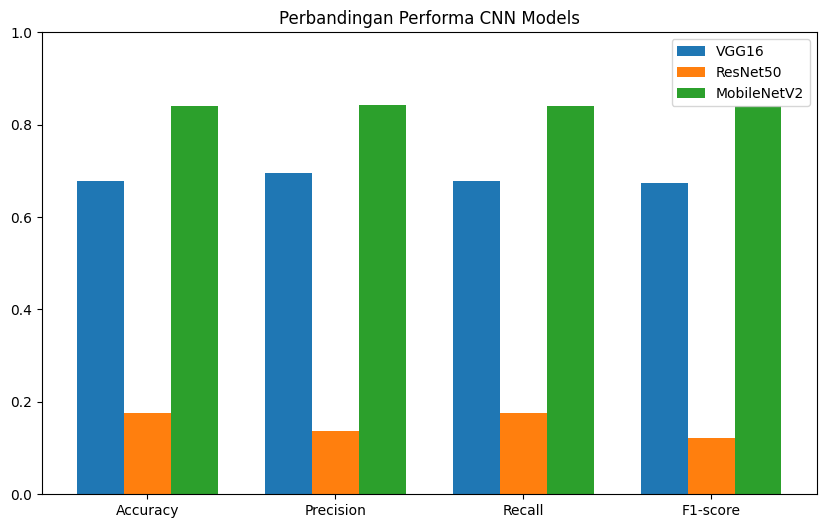

In [ ]:
labels = ["Accuracy", "Precision", "Recall", "F1-score"]
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, [results['VGG16'][m] for m in ['accuracy', 'precision', 'recall', 'f1']], width, label='VGG16')
plt.bar(x, [results['ResNet50'][m] for m in ['accuracy', 'precision', 'recall', 'f1']], width, label='ResNet50')
plt.bar(x + width, [results['MobileNetV2'][m] for m in ['accuracy', 'precision', 'recall', 'f1']], width, label='MobileNetV2')

plt.xticks(x, labels)
plt.ylim(0, 1)
plt.title("Perbandingan Performa CNN Models")
plt.legend()
plt.show()